In [1]:
# import packages that will be used in this project.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

% matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
import datetime as dt
NOW = dt.datetime(2013,12,31)

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df_register=pd.read_csv('Registration.csv',parse_dates=['RegDate'])
df_login=pd.read_csv('Login.csv',parse_dates=['date'])
df_purchase=pd.read_csv('Purchase.csv',parse_dates=['date'])

In [4]:
df_register.head(2)

,uid,RegDate
0,11BeHGFi,2013-11-13
1,11eFgjF1,2013-11-12


In [5]:
df_register.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25652 entries, 0 to 25651
Data columns (total 2 columns):
uid        25652 non-null object
RegDate    25652 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 400.9+ KB


In [6]:
df_register.rename(columns={"RegDate":"register_date"}, inplace=True)

In [7]:
df_register_cnt = df_register.groupby('register_date').count().reset_index()
df_register_cnt.head(2)

,register_date,uid
0,2013-10-31,61
1,2013-11-01,278


In [8]:
df_register_cnt.set_index('register_date',inplace=True)

Text(0.5,0,'Date')

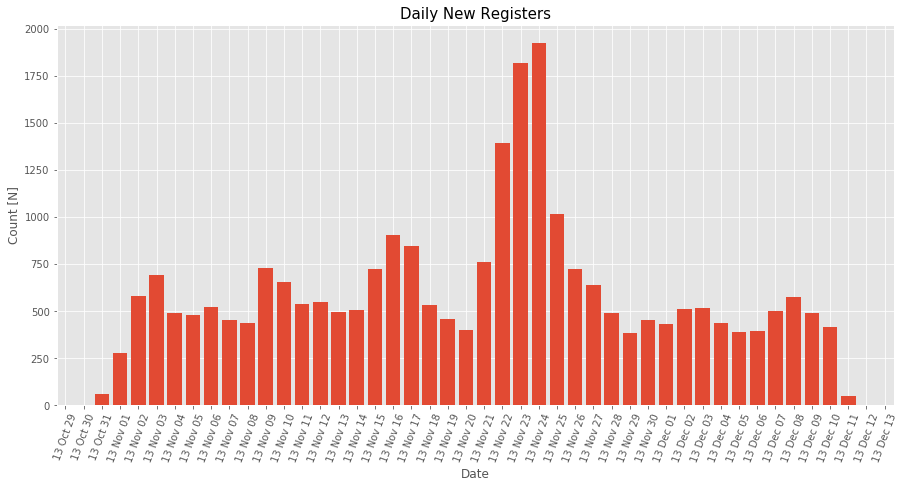

In [9]:
#set ggplot style
plt.style.use('ggplot')
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_register_cnt.index, df_register_cnt['uid'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y %b %d'))
plt.xticks(rotation=70)

ax.set_title('Daily New Registers',fontsize='15')
ax.set_ylabel('Count [N]')
ax.set_xlabel('Date')

## Wrangling Login Data

In [10]:
df_login.head(5)

,uid,date,time
0,11BeHGFi,2013-11-13,PM 10:52:13
1,11BeHGFi,2013-11-13,PM 10:52:13
2,11eFgjF1,2013-11-12,AM 2:09:05
3,11FoeMsb,2013-11-23,AM 12:53:26
4,11lWnNc2,2013-11-06,AM 1:44:50


In [11]:
df_login['uid'].describe()

count       129484
unique       25652
top       2Po3gRgh
freq            41
Name: uid, dtype: object

In [12]:
sum(df_login.duplicated())

1

In [13]:
df_login_rows=df_login[df_login.duplicated()]
df_login_rows

,uid,date,time
1,11BeHGFi,2013-11-13,PM 10:52:13


In [14]:
df_login.drop(1,inplace=True)

In [15]:
df_login.head(5)

,uid,date,time
0,11BeHGFi,2013-11-13,PM 10:52:13
2,11eFgjF1,2013-11-12,AM 2:09:05
3,11FoeMsb,2013-11-23,AM 12:53:26
4,11lWnNc2,2013-11-06,AM 1:44:50
5,11lWnNc2,2013-11-07,AM 12:42:04


In [16]:
df_login.sort_values(['uid','date']).head(10)

,uid,date,time
0,11BeHGFi,2013-11-13,PM 10:52:13
3,11FoeMsb,2013-11-23,AM 12:53:26
22,11PRg3oT,2013-11-02,PM 2:14:37
23,11PrTPJq,2013-12-09,AM 1:19:48
24,11PrTPJq,2013-12-10,AM 1:26:51
25,11QCbXo1,2013-11-06,PM 12:47:56
29,11VuQt4E,2013-12-02,PM 2:04:21
30,11XxSgFH,2013-12-07,PM 1:05:47
2,11eFgjF1,2013-11-12,AM 2:09:05
4,11lWnNc2,2013-11-06,AM 1:44:50


In [17]:
df_login.rename(columns={"date":"login_date","time":"login_time"},inplace=True)
df_login.head(2)

,uid,login_date,login_time
0,11BeHGFi,2013-11-13,PM 10:52:13
2,11eFgjF1,2013-11-12,AM 2:09:05


In [18]:
import re

In [19]:
def process_time(time):
    match = re.search('(\w+)\s(\d+):(\d+):(\d+)', time)
    if match.group(1) == 'AM':
        hour = int(match.group(2))

    else:
        hour = int(match.group(2))+12
    minute = match.group(3)
    second = match.group(4) 
    return hour

In [20]:
df_login['login_hour'] = df_login['login_time'].apply(process_time)

In [21]:
df_login.head()

,uid,login_date,login_time,login_hour
0,11BeHGFi,2013-11-13,PM 10:52:13,22
2,11eFgjF1,2013-11-12,AM 2:09:05,2
3,11FoeMsb,2013-11-23,AM 12:53:26,12
4,11lWnNc2,2013-11-06,AM 1:44:50,1
5,11lWnNc2,2013-11-07,AM 12:42:04,12


In [22]:
df_login.drop_duplicates()
df_login.groupby('login_date').count().reset_index()[['login_date', 'uid']]

,login_date,uid
0,2013-10-31,61
1,2013-11-01,312
2,2013-11-02,745
3,2013-11-03,1127
4,2013-11-04,1195
5,2013-11-05,1360
6,2013-11-06,1558
7,2013-11-07,1674
8,2013-11-08,1720
9,2013-11-09,2074


Text(0,0.5,'Count of Daily Active Users [N]')

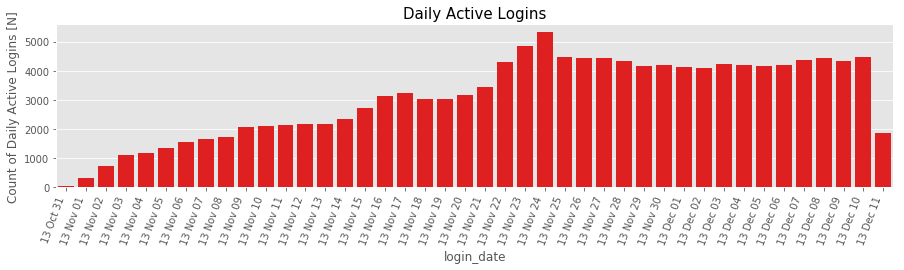

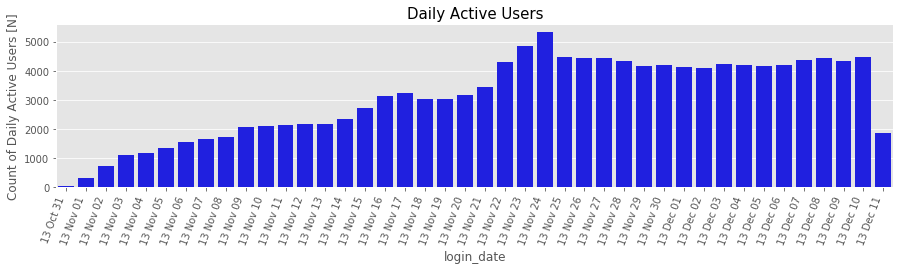

In [23]:
# Daily Active User Growth
# Daily Transaction Plot
plt.style.use('ggplot')
my_palette_1 = {'red'}
my_palette_2 = {'blue'}

df_login.sort_values(by = 'login_date',inplace=True)

#plot data
fig,ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x='login_date',data=df_login, palette=my_palette_1)
x_dates = df_login['login_date'].dt.strftime('%y %b %d').unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')

ax.set_title('Daily Active Logins',fontsize='15')
ax.set_ylabel('Count of Daily Active Logins [N]')
#ax.set_xlabel('Date')

#plot data
fig,ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x='login_date',data=df_login, palette=my_palette_2)
temp = df_login.drop_duplicates(subset=['login_date', 'uid'])

x_dates = temp['login_date'].dt.strftime('%y %b %d').unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')

ax.set_title('Daily Active Users',fontsize='15')
ax.set_ylabel('Count of Daily Active Users [N]')

In [24]:
df_login.head(2)

,uid,login_date,login_time,login_hour
9795,54sC7ITs,2013-10-31,PM 12:38:34,24
9742,54BneeFO,2013-10-31,PM 8:11:04,20


In [25]:
temp.head(2)

,uid,login_date,login_time,login_hour
9795,54sC7ITs,2013-10-31,PM 12:38:34,24
9742,54BneeFO,2013-10-31,PM 8:11:04,20


Text(0,0.5,'Count of Hourly Active Logins [N]')

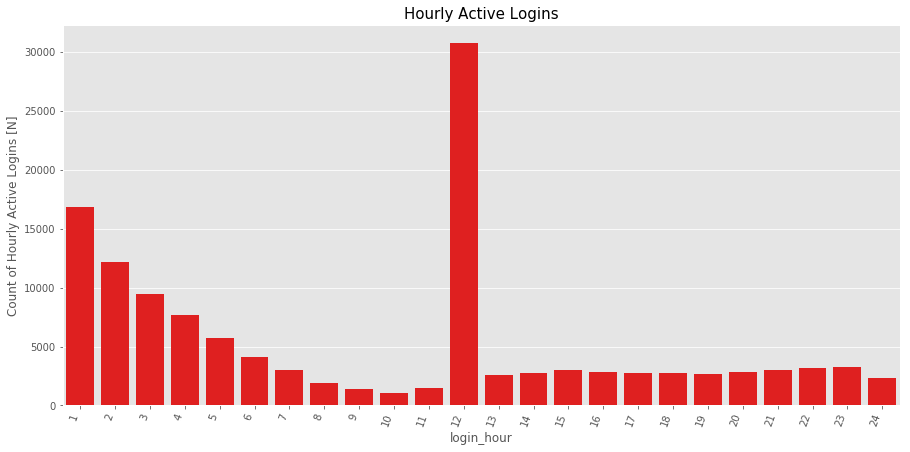

In [26]:
# Daily Active User Growth
# Daily Transaction Plot
plt.style.use('ggplot')
my_palette = {'red'}

#plot data
fig,ax = plt.subplots(figsize=(15,7))
ax=sns.countplot(x='login_hour',data=df_login, palette=my_palette)
x_hours = df_login['login_hour'].sort_values(ascending=True).unique()
ax.set_xticklabels(labels=x_hours, rotation=70, ha='right')


ax.set_title('Hourly Active Logins',fontsize='15')
ax.set_ylabel('Count of Hourly Active Logins [N]')
#ax.set_xlabel('Date')



In [27]:
#Get recent login to days

df_login['recent_login_days']=(NOW-df_login['login_date'].groupby(df_login['uid']).transform('max')).dt.days
df_login.head(2)

,uid,login_date,login_time,login_hour,recent_login_days
9795,54sC7ITs,2013-10-31,PM 12:38:34,24,22
9742,54BneeFO,2013-10-31,PM 8:11:04,20,48


In [28]:
df_login['recent_login_days'].describe()

count    129483.000000
mean         27.079709
std           9.200421
min          20.000000
25%          21.000000
50%          22.000000
75%          32.000000
max          61.000000
Name: recent_login_days, dtype: float64

Text(0.5,0,'Number of Days till Now')

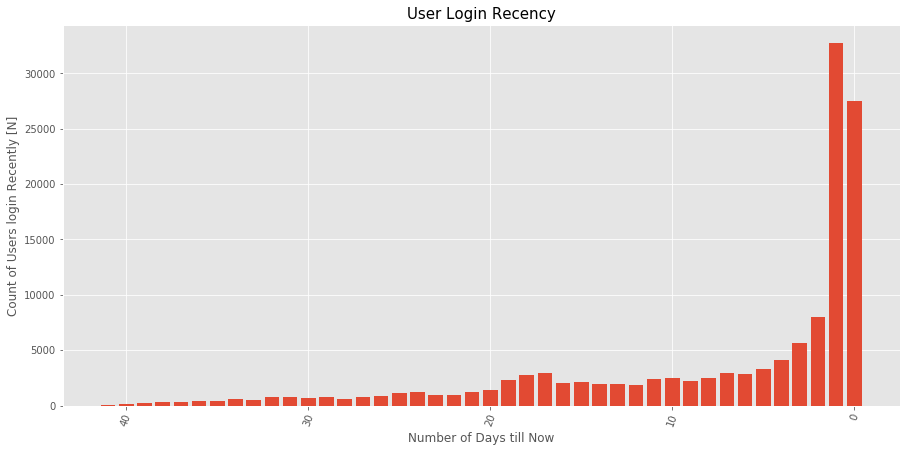

In [29]:
df_login_cnt = df_login.groupby('recent_login_days').count().reset_index()
#df_login_cnt.set_index('recent_login_days',inplace=True)
df_login_cnt.sort_values(['recent_login_days'],ascending=False,inplace=True)
#set ggplot style
plt.style.use('ggplot')
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_login_cnt.index, df_login_cnt['uid'])

#set ticks every week
#ax.xaxis.set_major_locator(mdates.DayLocator())
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%y %b %d'))
plt.xticks(rotation=70)
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_title('User Login Recency',fontsize='15')
ax.set_ylabel('Count of Users login Recently [N]')
ax.set_xlabel('Number of Days till Now')

## Wrangling Purchase Data

In [30]:
df_purchase.head(2)

,osuser_id,item_id,cash_spent_usd,date,time
0,R1jUicEV,2,$3.99,2013-10-31,PM 11:49:44
1,qf1opMEQ,2,$3.99,2013-11-04,PM 8:16:23


In [31]:
sum(df_purchase.duplicated())

0

In [32]:
df_purchase.dtypes

osuser_id                 object
item_id                    int64
cash_spent_usd            object
date              datetime64[ns]
time                      object
dtype: object

In [33]:
df_purchase['cash_spent_usd']=df_purchase['cash_spent_usd'].str.slice(start=1).astype(float)

In [34]:
df_purchase.sort_values(['osuser_id','item_id','date']).head(5)

,osuser_id,item_id,cash_spent_usd,date,time
3045,12tBHsip,2,3.99,2013-12-07,PM 3:41:29
4472,16p8U2Rt,2,3.99,2013-12-05,AM 3:29:43
2074,1B8J6m2b,2,3.99,2013-11-16,AM 5:51:32
2108,1B8J6m2b,2,3.99,2013-11-18,AM 4:19:18
2077,1B8J6m2b,3,8.99,2013-11-16,PM 10:00:49


In [35]:
df_purchase.rename(columns={"osuser_id": "uid","date":"purchase_date","time":"purchase_time"},inplace=True)
df_purchase.head(2)

,uid,item_id,cash_spent_usd,purchase_date,purchase_time
0,R1jUicEV,2,3.99,2013-10-31,PM 11:49:44
1,qf1opMEQ,2,3.99,2013-11-04,PM 8:16:23


In [36]:
df_purchase['purchase_hour'] = df_purchase['purchase_time'].apply(process_time)

In [37]:
df_purchase['cash_spent_usd'].unique()

array([ 3.99,  0.99,  8.99, 16.99, 64.99, 34.99])

In [38]:
df_purchase['item_id'].unique()

array([ 2,  7,  3,  4,  1,  6,  5, 12,  8, 10, 11,  9])

In [39]:
df_purchase.groupby(['item_id','cash_spent_usd']).size()

item_id  cash_spent_usd
1        0.99              1376
2        3.99              1352
3        8.99              1163
4        16.99              668
5        34.99              345
6        64.99              200
7        0.99                60
8        3.99                55
9        8.99                47
10       16.99               61
11       34.99               11
12       64.99               15
dtype: int64

Text(0,0.5,'Count of Daily Purchased Users [N]')

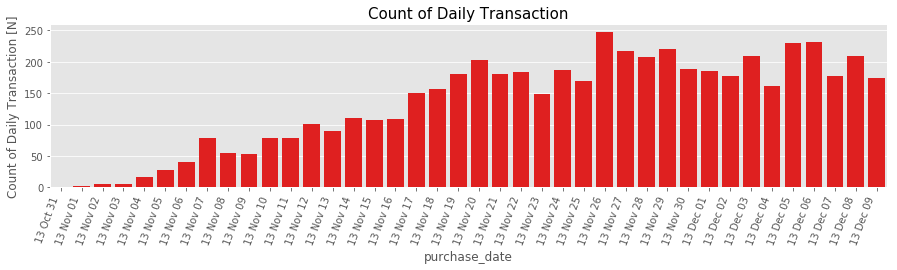

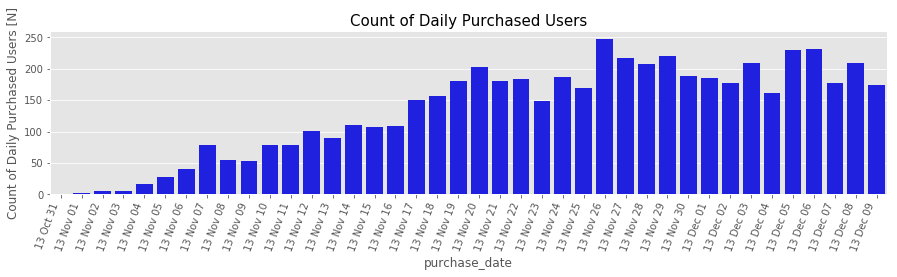

In [40]:
# Daily Transaction Plot
plt.style.use('ggplot')
my_palette1_ = {'red'}
my_palette2_ = {'blue'}
#plot data
df_purchase.sort_values(by = 'purchase_date',inplace=True)

fig,ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x='purchase_date',data=df_purchase,palette=my_palette_1)
x_dates = df_purchase['purchase_date'].dt.strftime('%y %b %d').unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')

ax.set_title('Count of Daily Transaction',fontsize='15')
ax.set_ylabel('Count of Daily Transaction [N]')
#ax.set_xlabel('Date')

#plot data
fig,ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x='purchase_date',data=df_purchase,palette=my_palette_2)
temp = df_purchase.drop_duplicates(subset=['purchase_date', 'uid'])
x_dates = temp['purchase_date'].dt.strftime('%y %b %d').unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')

ax.set_title('Count of Daily Purchased Users',fontsize='15')
ax.set_ylabel('Count of Daily Purchased Users [N]')


Text(0,0.5,'Count of Hourly Transaction [N]')

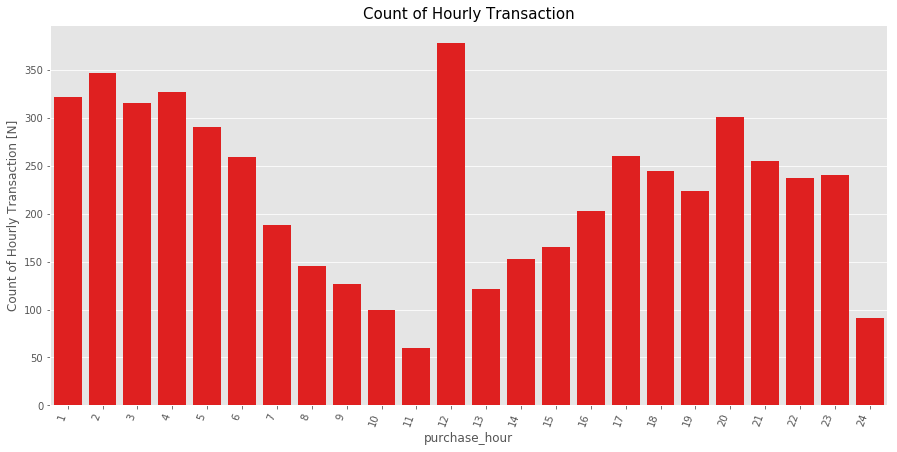

In [41]:
# Daily Transaction Plot
plt.style.use('ggplot')
my_palette = {'red'}

#plot data
fig,ax = plt.subplots(figsize=(15,7))
ax=sns.countplot(x='purchase_hour',data=df_purchase,palette=my_palette)
x_dates = df_purchase['purchase_hour'].sort_values(ascending=True).unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')

ax.set_title('Count of Hourly Transaction',fontsize='15')
ax.set_ylabel('Count of Hourly Transaction [N]')
#ax.set_xlabel('Date')



Text(0,0.5,'Count of Daily Transaction [N]')

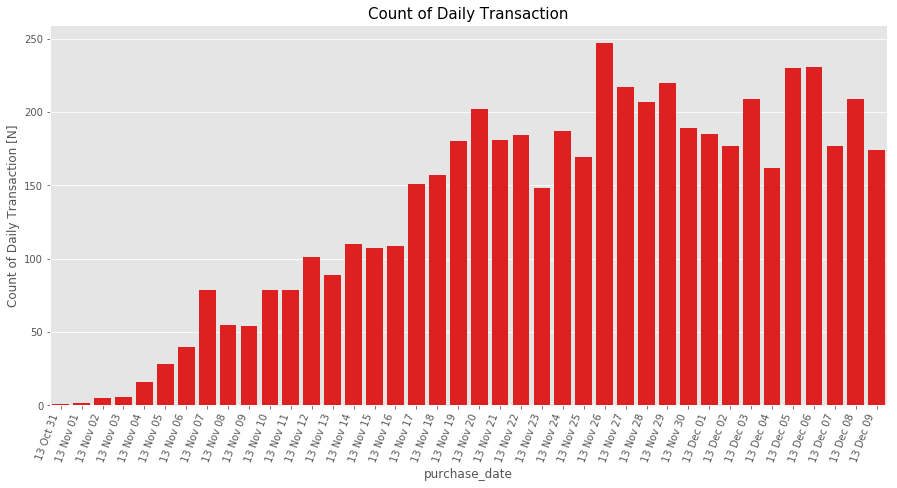

In [42]:
# Daily Transaction Plot
plt.style.use('ggplot')
my_palette = {'red'}

#plot data
fig,ax = plt.subplots(figsize=(15,7))
ax=sns.countplot(x='purchase_date',data=df_purchase,palette=my_palette)
x_dates = df_purchase['purchase_date'].dt.strftime('%y %b %d').unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')

ax.set_title('Count of Daily Transaction',fontsize='15')
ax.set_ylabel('Count of Daily Transaction [N]')
#ax.set_xlabel('Date')



In [43]:
df_purchase_cnt_sum = df_purchase.groupby('purchase_date')['cash_spent_usd'].agg(['sum','count', 'mean']).reset_index('purchase_date')

df_purchase_cnt_sum.head(2)

,purchase_date,sum,count,mean
0,2013-10-31,3.99,1,3.99
1,2013-11-01,25.98,2,12.99


Text(0,0.5,'Sum of Revenue by Date')

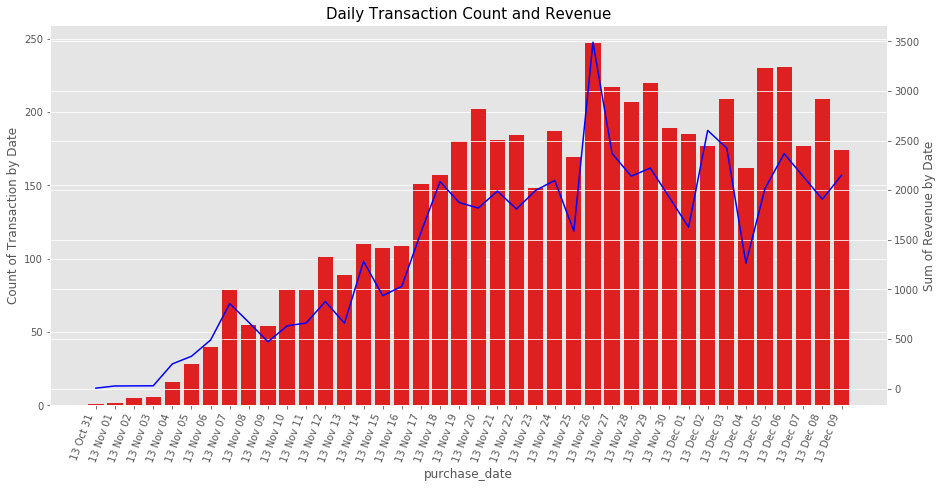

In [44]:
#set ggplot style
plt.style.use('ggplot')
#plot data
fig, ax = plt.subplots(figsize=(15,7))

ax=sns.barplot(x='purchase_date', data=df_purchase_cnt_sum,y='count',color='r')
ax2 = plt.twinx()
ax2=sns.lineplot(data=df_purchase_cnt_sum['sum'], color="b", ax=ax2)

#set ticks every week

x_dates = df_purchase_cnt_sum['purchase_date'].dt.strftime('%y %b %d').unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')


ax.set_title('Daily Transaction Count and Revenue',fontsize='15')
ax.set_ylabel('Count of Transaction by Date')
ax2.set_ylabel('Sum of Revenue by Date')
#ax.set_xlabel('Date')

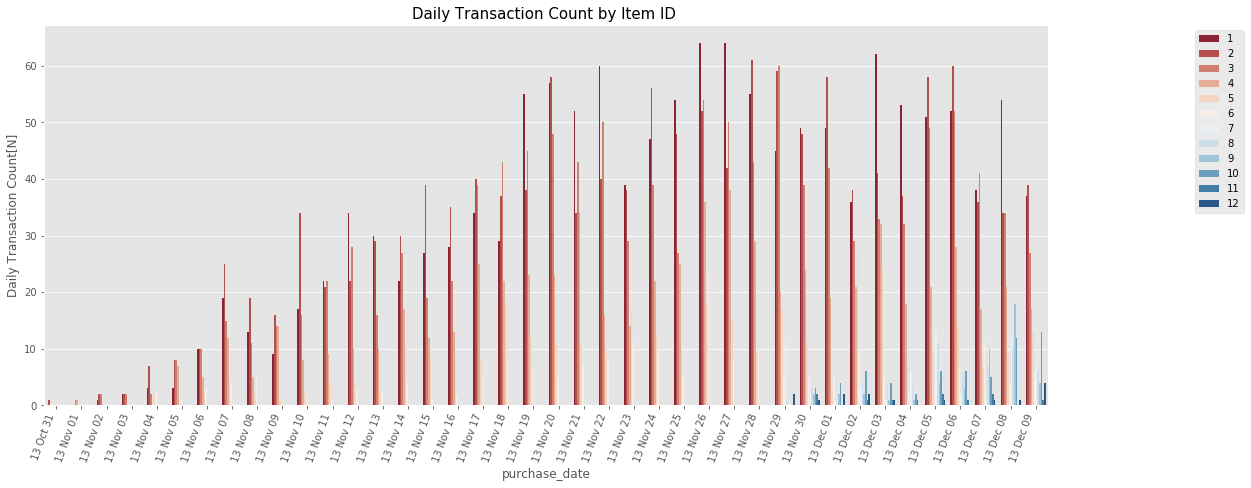

In [45]:
df_purchase_cnt_item = df_purchase.groupby(['purchase_date','item_id']).count().reset_index()
# Daily Transaction Count Plot by item id
plt.style.use('ggplot')

#plot data
fig,ax = plt.subplots(figsize=(18,7))
ax=sns.barplot(x='purchase_date', data=df_purchase_cnt_item,y='uid',palette='RdBu',hue='item_id')
x_dates = df_purchase_cnt_sum['purchase_date'].dt.strftime('%y %b %d').unique()
ax.set_xticklabels(labels=x_dates, rotation=70, ha='right')


ax.set_title('Daily Transaction Count by Item ID ',fontsize='15')
ax.set_ylabel('Daily Transaction Count[N]')
#ax.set_xlabel('Date')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))


In [46]:
df_purchase.head(2)

,uid,item_id,cash_spent_usd,purchase_date,purchase_time,purchase_hour
0,R1jUicEV,2,3.99,2013-10-31,PM 11:49:44,23
8,YcSHBLOo,4,16.99,2013-11-01,AM 5:17:10,5


In [47]:
ts_purchase = df_purchase.groupby('purchase_date')['cash_spent_usd'].agg(['sum','count']).reset_index('purchase_date')
ts_purchase = ts_purchase.rename(columns={'purchase_date': 'date', 'count': 'purchase_cnt', 'sum': 'purchase_sum'})

In [48]:
ts_login = df_login.groupby('login_date')['uid'].agg(['count']).reset_index('login_date')
ts_login = ts_login.rename(columns={'login_date': 'date', 'count': 'login_cnt'})

In [49]:
ts_df = pd.merge(ts_login, ts_purchase, on = 'date', how = 'inner')

In [50]:
ts_df.to_csv('user_data.csv')

In [51]:
temp = df_purchase.sort_values(by=['purchase_date']).drop_duplicates(subset=['uid'], keep='first')
first_purchase = temp[['uid', 'purchase_date']]
first_register = df_register.sort_values(by=['register_date']).drop_duplicates(subset=['uid'], keep='first')

In [52]:
first_register_purchase = pd.merge(first_register, first_purchase, on = 'uid', how = 'inner')

In [53]:
first_register_purchase['duration'] = (first_register_purchase['purchase_date'] \
- first_register_purchase['register_date']).dt.days


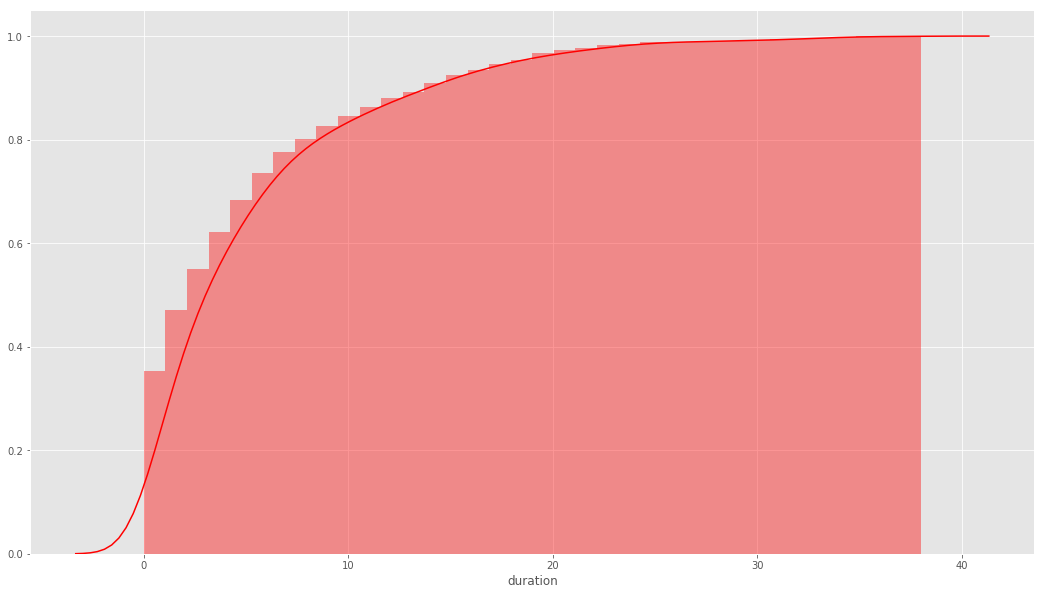

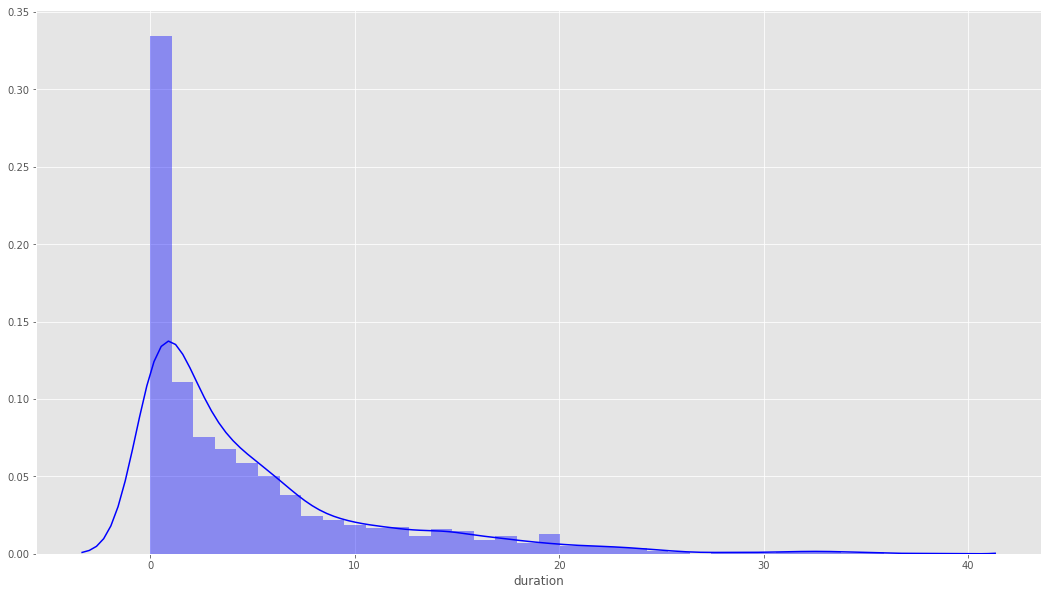

In [54]:
plt.subplots(figsize=(18,10))
sns.distplot(first_register_purchase['duration'], color='r', hist_kws = {'cumulative':True}, kde_kws={'cumulative':True})
plt.subplots(figsize=(18,10))
sns.distplot(first_register_purchase['duration'], color='b', hist_kws = {'cumulative':False}, kde_kws={'cumulative':False})

## RFM Analysis

In [55]:
temp[['uid', 'purchase_date']]

,uid,purchase_date
0,R1jUicEV,2013-10-31
8,YcSHBLOo,2013-11-01
7,CvpiOGqT,2013-11-01
116,uDLYnOib,2013-11-02
115,IvoOjIdf,2013-11-02
10,SUEt8C1d,2013-11-02
9,BXnVWnmR,2013-11-02
114,N8M2Q2Qj,2013-11-02
245,BhBWrbIF,2013-11-03
248,PQKTs3iT,2013-11-03


In [56]:
#Calc RFM
df_purchase['monetary']=df_purchase['cash_spent_usd'].groupby(df_purchase['uid']).transform('sum')
df_purchase['purchase_recency']=(NOW-df_purchase['purchase_date'].groupby(df_purchase['uid']).transform('max')).dt.days
df_purchase['frequency']=df_purchase['cash_spent_usd'].groupby(df_purchase['uid']).transform('count')
df_frm=df_purchase[['uid','monetary','purchase_recency','frequency']]
df_frm.sort_values('uid').head(5)

,uid,monetary,purchase_recency,frequency
3045,12tBHsip,3.99,24,1
4472,16p8U2Rt,3.99,26,1
2108,1B8J6m2b,33.96,42,4
2077,1B8J6m2b,33.96,42,4
2074,1B8J6m2b,33.96,42,4


In [57]:
sum(df_frm.duplicated()),df_frm.shape

(3973, (5353, 4))

In [58]:
#drop duplicates in RFM
df_frm.drop_duplicates(keep = 'first', inplace = True) 
sum(df_frm.duplicated()),df_frm.shape

(0, (1380, 4))

In [59]:
df_frm.head(2)

,uid,monetary,purchase_recency,frequency
0,R1jUicEV,3.99,61,1
8,YcSHBLOo,25.98,35,2


In [60]:
df_frm.describe()

,monetary,purchase_recency,frequency
count,1380.000000,1380.000000,1380.000000
mean,41.107587,33.450725,3.878986
std,81.316414,9.796540,4.690168
min,0.990000,22.000000,1.000000
25%,4.980000,25.000000,1.000000
50%,16.990000,32.000000,2.000000
75%,37.865000,40.000000,4.000000
max,1206.770000,61.000000,50.000000


In [61]:
#Calc RFM Percentile
df_frm['r_quartile'] = pd.qcut(df_frm['purchase_recency'],q=[0,.25,.5,.75,1], labels=['4','3','2','1'] )
df_frm['m_quartile'] = pd.qcut(df_frm['monetary'], q=[0,.25,.5,.75,1], labels=['1','2','3','4'])
df_frm['f_quartile'] = pd.cut(df_frm['frequency'], bins=[0,1,2,4,50], labels=['1','2','3','4'])

df_frm.head(5)

,uid,monetary,purchase_recency,frequency,r_quartile,m_quartile,f_quartile
0,R1jUicEV,3.99,61,1,1,1,1
8,YcSHBLOo,25.98,35,2,2,3,2
7,CvpiOGqT,8.99,60,1,1,2,1
116,uDLYnOib,3.99,59,1,1,1,1
115,IvoOjIdf,3.99,59,1,1,1,1


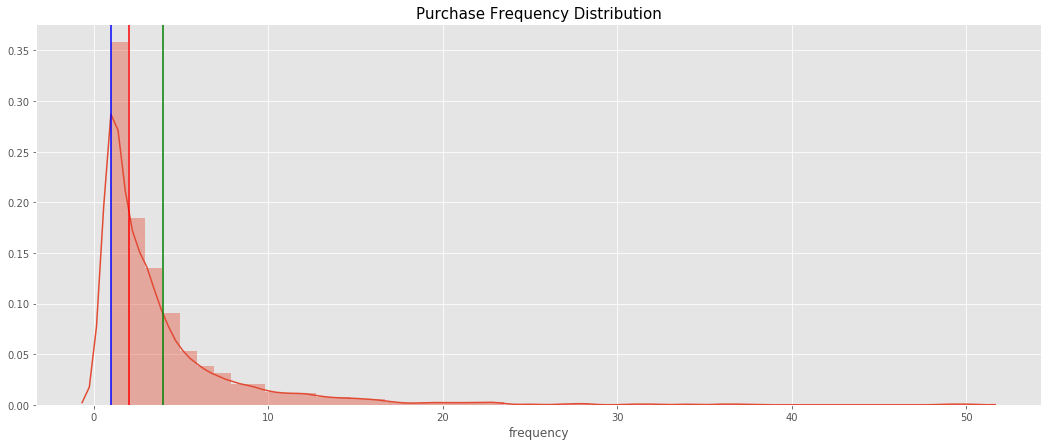

In [62]:
fig,ax = plt.subplots(figsize=(18,7))
ax=sns.distplot(df_frm['frequency'].astype(int))
ax.set_title('Purchase Frequency Distribution',fontsize='15')
plt.axvline(1,color='b')
plt.axvline(2,color='r')
plt.axvline(4,color='g')

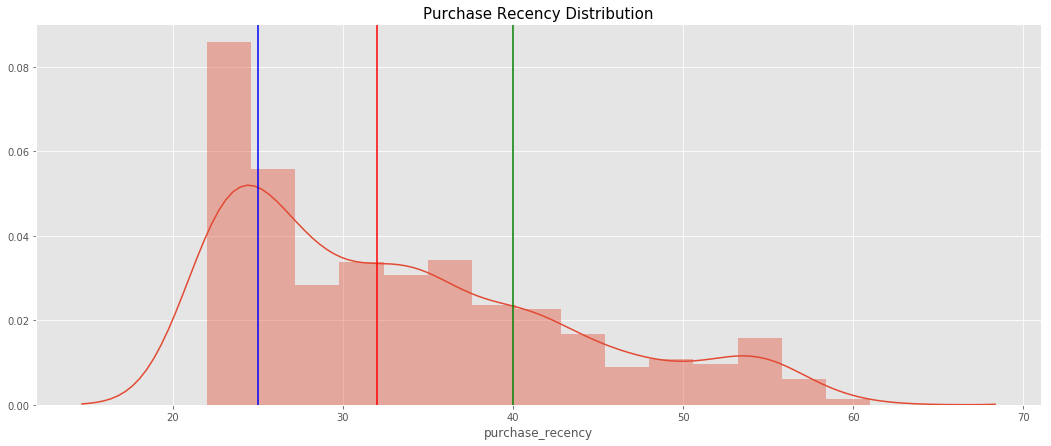

In [63]:
fig,ax = plt.subplots(figsize=(18,7))
ax=sns.distplot(df_frm['purchase_recency'].astype(int))
ax.set_title('Purchase Recency Distribution',fontsize='15')

plt.axvline(25,color='b')
plt.axvline(32,color='r')
plt.axvline(40,color='g')

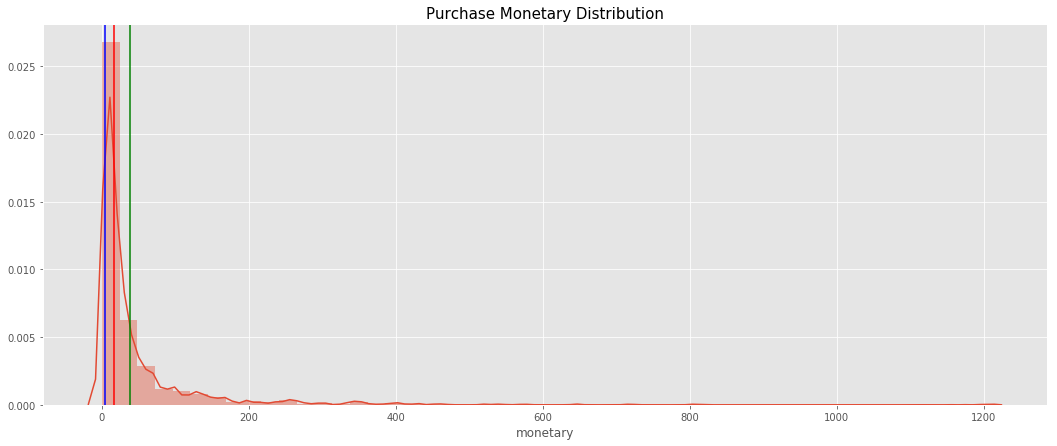

In [64]:
fig,ax = plt.subplots(figsize=(18,7))
ax=sns.distplot(df_frm['monetary'].astype(int))
ax.set_title('Purchase Monetary Distribution',fontsize='15')
plt.axvline(4.98,color='b')
plt.axvline(16.99,color='r')
plt.axvline(37.865,color='g')

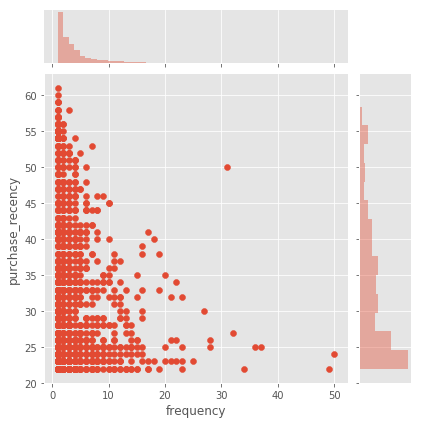

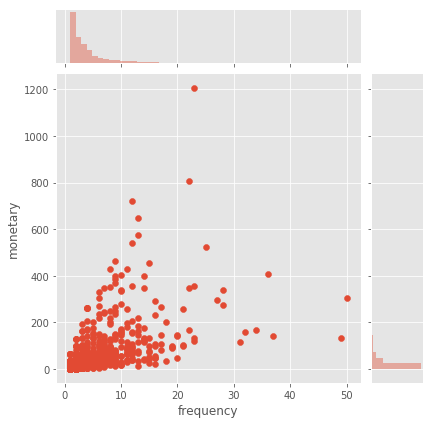

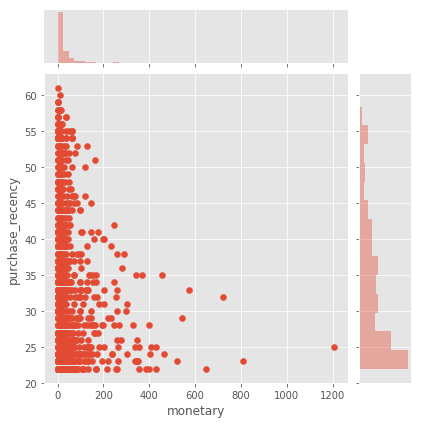

In [65]:
sns.jointplot(x='frequency',y='purchase_recency',data=df_frm)

sns.jointplot(x='frequency',y='monetary',data=df_frm)

sns.jointplot(x='monetary',y='purchase_recency',data=df_frm)

In [66]:
# Calc RFM seg
df_frm['RFM_seg'] = df_frm.r_quartile.astype(str)+ df_frm.f_quartile.astype(str) +df_frm.m_quartile.astype(str)
df_frm['RFM_score'] = df_frm.r_quartile.astype(int)+df_frm.f_quartile.astype(int)+df_frm.m_quartile.astype(int)
df_frm.head()

,uid,monetary,purchase_recency,frequency,r_quartile,m_quartile,f_quartile,RFM_seg,RFM_score
0,R1jUicEV,3.99,61,1,1,1,1,111,3
8,YcSHBLOo,25.98,35,2,2,3,2,223,7
7,CvpiOGqT,8.99,60,1,1,2,1,112,4
116,uDLYnOib,3.99,59,1,1,1,1,111,3
115,IvoOjIdf,3.99,59,1,1,1,1,111,3


In [67]:
# customer seg distribution
df_frm_glance=df_frm.groupby('RFM_score').agg({'uid': 'count', 'monetary': 'sum'}).reset_index()
df_frm_glance

,RFM_score,uid,monetary
0,3,94,243.06
1,4,129,913.57
2,5,177,1321.59
3,6,183,2209.83
4,7,158,2634.39
5,8,154,4285.28
6,9,116,5247.97
7,10,140,9935.38
8,11,120,12351.54
9,12,109,17585.86


In [68]:
## user group - lost
df_frm[df_frm['RFM_seg']=='111'].head(5)

,uid,monetary,purchase_recency,frequency,r_quartile,m_quartile,f_quartile,RFM_seg,RFM_score
0,R1jUicEV,3.99,61,1,1,1,1,111,3
116,uDLYnOib,3.99,59,1,1,1,1,111,3
115,IvoOjIdf,3.99,59,1,1,1,1,111,3
114,N8M2Q2Qj,0.99,59,1,1,1,1,111,3
246,ogvVvOXq,3.99,58,1,1,1,1,111,3


In [69]:
# user group champion
df_frm[df_frm['RFM_seg']=='444'].head(5)

,uid,monetary,purchase_recency,frequency,r_quartile,m_quartile,f_quartile,RFM_seg,RFM_score
251,umj2BlTw,58.91,23,9,4,4,4,444,12
119,cV5umDkb,200.95,25,5,4,4,4,444,12
261,E23WEELi,429.92,25,8,4,4,4,444,12
698,8CE5FE8G,264.91,25,9,4,4,4,444,12
20,bodevnCf,52.95,23,5,4,4,4,444,12


#### Customer Segmentation
Based on RFM percentile, customers can be clasified into 64 categories. Following categories are the key segments. 

| Segment | RFM	| Description|	Marketing|
| --- | --- | --- | --- |
| Champions | 444 | Bought recently, buy often and spend the most |No price incentives and promotions |
| Loyal Customers |X4X |Customers who bought most frequently| Use R and M to further segment | 
| Big Spenders | XX4 | Customers who spent the most	| Market expensive products |
| Recent Customer|4XX| Customer who bought most recently | Use F and M to further segment|
| Almost Lost | 244| Haven't purchased for some time, but purchased frequently and spend the most| Agressive incentives |
| Lost Customers|144 | Haven't purchased for long time, but purchased frequently and spend the most| Agressive incentives to re-activate|
| Lost Cheap Customers| 111 | Last purchase long ago, purchased few and spend little| Don't spend too much trying to re-acquire |

In [70]:
df_frm['RFM_seg_label']=df_frm[['r_quartile','f_quartile','m_quartile']].apply(lambda row: 'Champions' if ((int(row['r_quartile'])==4)&(int(row['f_quartile'])==4)&(int(row['m_quartile'])==4)) 
else 'Loyal Customers' if ((int(row['r_quartile'])!=4)&(int(row['f_quartile'])==4)&(int(row['m_quartile'])!=4)) 
else 'Big Spenders' if((int(row['r_quartile'])!=4)&(int(row['f_quartile'])!=4)&(int(row['m_quartile'])==4))
else 'Recent Customer' if((int(row['r_quartile'])==4)&(int(row['f_quartile'])!=4)&(int(row['m_quartile'])!=4))
else 'Almost Lost' if ((int(row['r_quartile'])==2)&(int(row['f_quartile'])==4)&(int(row['m_quartile'])==4))  
else 'Lost Customers' if ((int(row['r_quartile'])==1)&(int(row['f_quartile'])==4)&(int(row['m_quartile'])==4)) 
else 'Lost Cheap Customers' if ((int(row['r_quartile'])==1)&(int(row['f_quartile'])==1)&(int(row['m_quartile'])==1)) 
else 'Other', axis=1)
df_frm.head(5)

,uid,monetary,purchase_recency,frequency,r_quartile,m_quartile,f_quartile,RFM_seg,RFM_score,RFM_seg_label
0,R1jUicEV,3.99,61,1,1,1,1,111,3,Lost Cheap Customers
8,YcSHBLOo,25.98,35,2,2,3,2,223,7,Other
7,CvpiOGqT,8.99,60,1,1,2,1,112,4,Other
116,uDLYnOib,3.99,59,1,1,1,1,111,3,Lost Cheap Customers
115,IvoOjIdf,3.99,59,1,1,1,1,111,3,Lost Cheap Customers


In [71]:
df_purchase.head(10)

,uid,item_id,cash_spent_usd,purchase_date,purchase_time,purchase_hour,monetary,purchase_recency,frequency
0,R1jUicEV,2,3.99,2013-10-31,PM 11:49:44,23,3.99,61,1
8,YcSHBLOo,4,16.99,2013-11-01,AM 5:17:10,5,25.98,35,2
7,CvpiOGqT,3,8.99,2013-11-01,PM 9:35:29,21,8.99,60,1
116,uDLYnOib,2,3.99,2013-11-02,PM 9:51:42,21,3.99,59,1
115,IvoOjIdf,2,3.99,2013-11-02,PM 10:14:42,22,3.99,59,1
10,SUEt8C1d,3,8.99,2013-11-02,PM 1:08:35,13,303.94,31,6
9,BXnVWnmR,3,8.99,2013-11-02,AM 3:43:35,3,69.89,37,11
114,N8M2Q2Qj,1,0.99,2013-11-02,PM 10:47:09,22,0.99,59,1
244,BhBWrbIF,1,0.99,2013-11-03,PM 3:54:45,15,13.97,58,3
246,ogvVvOXq,2,3.99,2013-11-03,PM 2:20:22,14,3.99,58,1


In [72]:
df=df_purchase.merge(df_register, on='uid' )
df.head(2)

,uid,item_id,cash_spent_usd,purchase_date,purchase_time,purchase_hour,monetary,purchase_recency,frequency,register_date
0,R1jUicEV,2,3.99,2013-10-31,PM 11:49:44,23,3.99,61,1,2013-10-31
1,YcSHBLOo,4,16.99,2013-11-01,AM 5:17:10,5,25.98,35,2,2013-11-01


In [73]:
df=df.merge(df_login, on='uid' )

In [74]:
df.head(3)

,uid,item_id,cash_spent_usd,purchase_date,purchase_time,purchase_hour,monetary,purchase_recency,frequency,register_date,login_date,login_time,login_hour,recent_login_days
0,R1jUicEV,2,3.99,2013-10-31,PM 11:49:44,23,3.99,61,1,2013-10-31,2013-10-31,PM 9:56:42,21,56
1,R1jUicEV,2,3.99,2013-10-31,PM 11:49:44,23,3.99,61,1,2013-10-31,2013-11-01,AM 12:22:41,12,56
2,R1jUicEV,2,3.99,2013-10-31,PM 11:49:44,23,3.99,61,1,2013-10-31,2013-11-02,AM 2:34:21,2,56


In [75]:
#df_frm.rename(columns={"uid":"Customer","monetary":"Monetary Value",'purchase_recency':"Recency","frequency":'Frequency','r_quartile':'R Quartile','f_quartile':'F Quartile','m_quartile':'M Quartile','RFM_seg':'RFM'},inplace=True)
df_frm.head(5)

,uid,monetary,purchase_recency,frequency,r_quartile,m_quartile,f_quartile,RFM_seg,RFM_score,RFM_seg_label
0,R1jUicEV,3.99,61,1,1,1,1,111,3,Lost Cheap Customers
8,YcSHBLOo,25.98,35,2,2,3,2,223,7,Other
7,CvpiOGqT,8.99,60,1,1,2,1,112,4,Other
116,uDLYnOib,3.99,59,1,1,1,1,111,3,Lost Cheap Customers
115,IvoOjIdf,3.99,59,1,1,1,1,111,3,Lost Cheap Customers


In [76]:
df_frm[(df_frm['r_quartile'] == '1') & (df_frm['f_quartile'] == '1')].size, df_frm.size

(1720, 13800)

In [77]:
df_frm['RFM_seg_label'].value_counts()

Other                   760
Recent Customer         209
Champions               109
Lost Cheap Customers     94
Big Spenders             80
Loyal Customers          66
Almost Lost              47
Lost Customers           15
Name: RFM_seg_label, dtype: int64

In [78]:
## Export data into CSV for visualization
df.to_csv(r'df_all.csv',index=False)
df_frm.to_csv(r'frm.csv',index=False)
df_frm_glance.to_csv(r'frm_glance.csv',index=False)

In [79]:
# join register table and transaction
df_reg_m=df_register.merge(df_frm,on='uid',how='left')
df_reg_m.head(2)

,uid,register_date,monetary,purchase_recency,frequency,r_quartile,m_quartile,f_quartile,RFM_seg,RFM_score,RFM_seg_label
0,11BeHGFi,2013-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11eFgjF1,2013-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df_reg_m['monetary'].fillna(0,inplace=True)

In [81]:
df_reg_m.query('monetary !=0 & register_date=="2013-11-24"').shape,df_reg_m.query('register_date=="2013-11-24"').shape

((76, 11), (1924, 11))

In [82]:
df_reg_m.to_csv(r'reg_monetary.csv',index=False)